In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/tesla-stock-price/Tesla.csv - Tesla.csv.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.shape

(1692, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

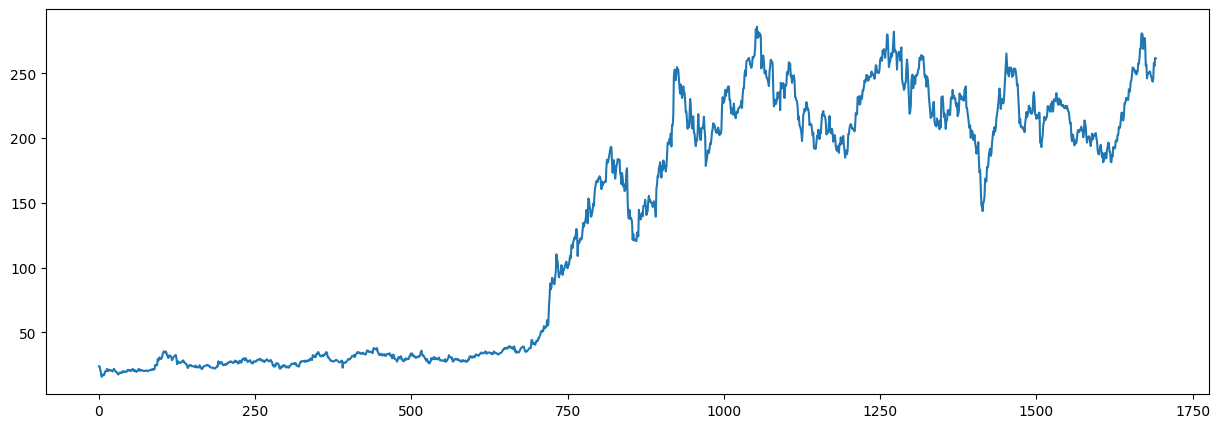

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.show

In [8]:
# lets check if all the value in Close == Adf_Close
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [9]:
df = df.drop(['Adj Close'],axis = 1)

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
# no null value
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [13]:
import seaborn as sb

/tmp/ipykernel_18/512157342.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


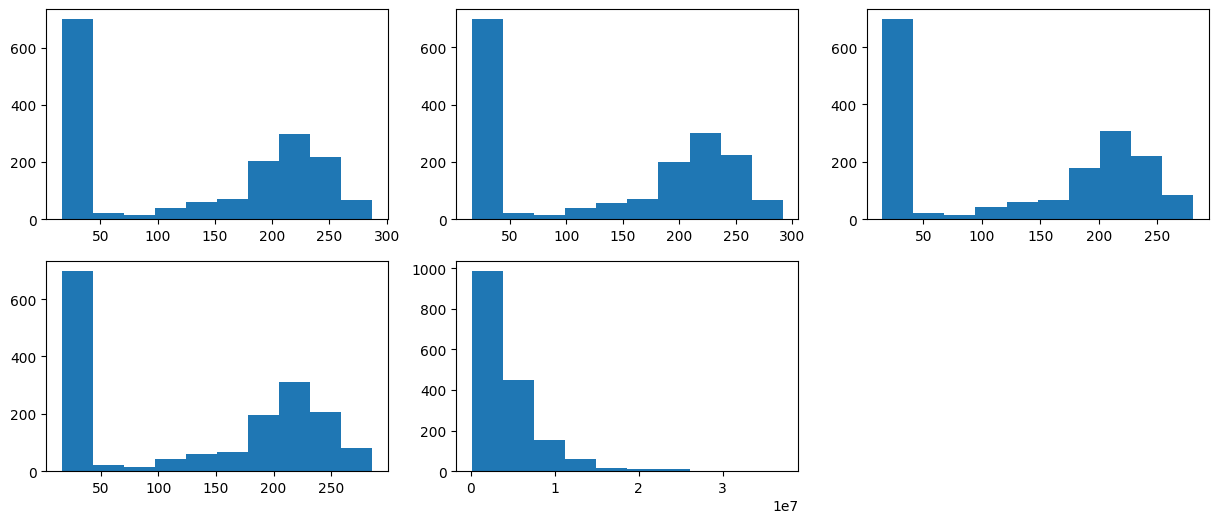

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(15,6))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    plt.hist(df[col])
plt.show()

/tmp/ipykernel_18/3833827021.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/tmp/ipykernel_18/3833827021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3833827021.py:4: UserWarning: 

`distplot` is a 

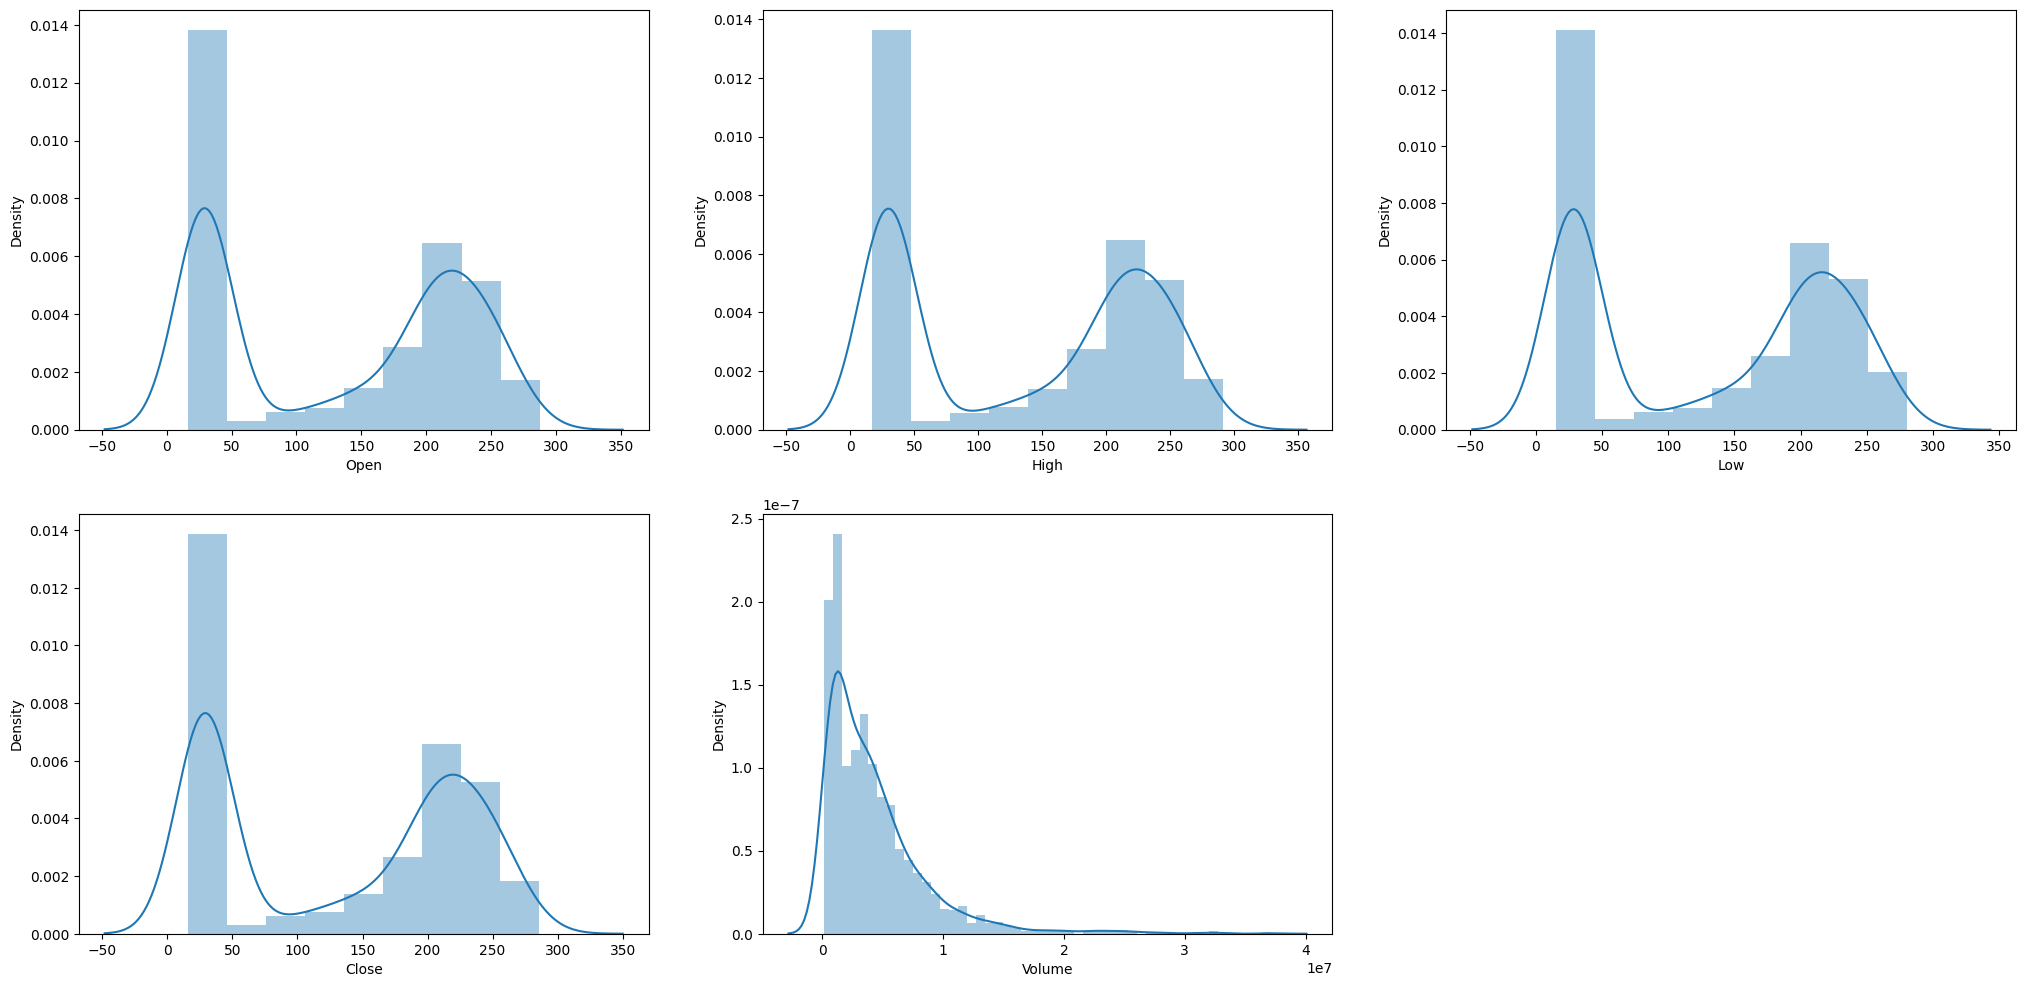

In [15]:
plt.subplots(figsize=(25,12))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

/tmp/ipykernel_18/2006237624.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


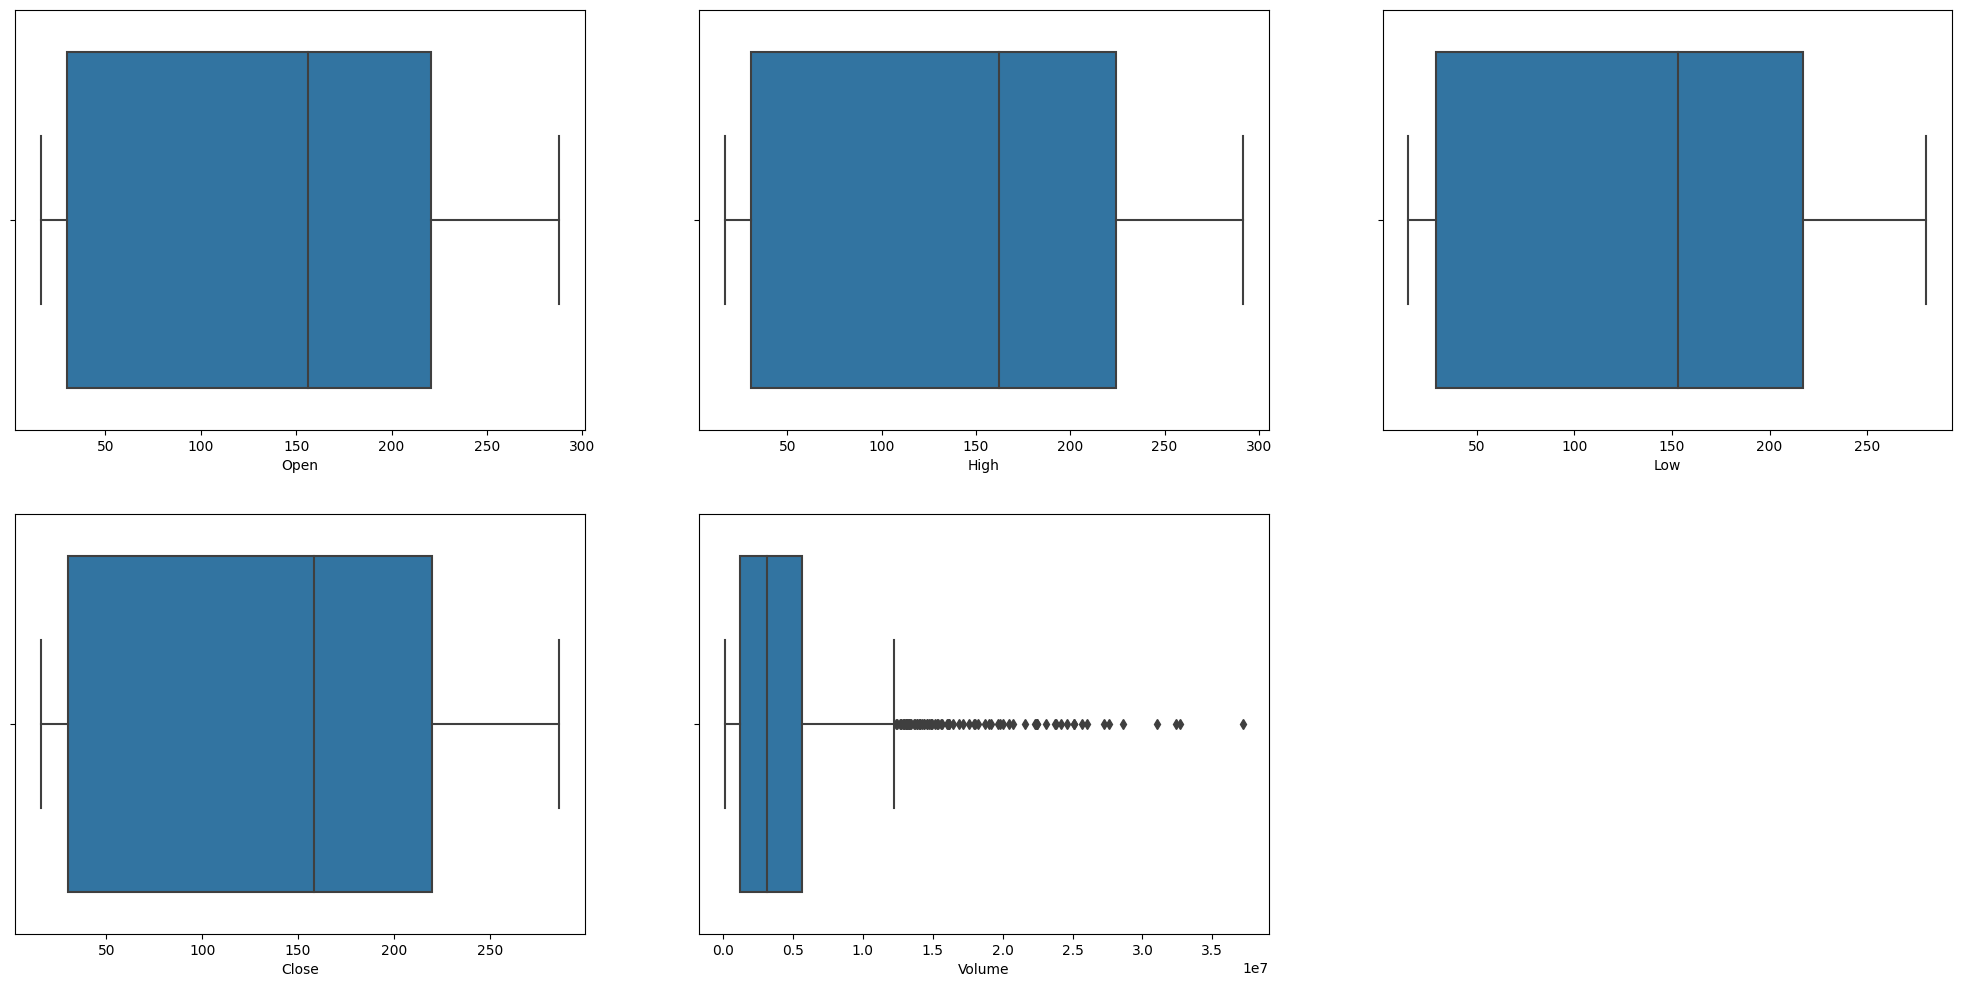

In [16]:
plt.subplots(figsize=(25,12))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(x=df[col])
plt.show()

In [17]:
splitted = df['Date'].str.split('/',expand=True)

In [18]:
splitted.head()

,0,1,2
0,6,29,2010
1,6,30,2010
2,7,1,2010
3,7,2,2010
4,7,6,2010


In [19]:
df['day'] = splitted[1].astype('int')

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,day
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6


In [21]:
df['month'] = splitted[0].astype('int')

In [22]:
df['year'] = splitted[2].astype('int')

In [23]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [24]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)

In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1692 non-null   object 
 1   Open            1692 non-null   float64
 2   High            1692 non-null   float64
 3   Low             1692 non-null   float64
 4   Close           1692 non-null   float64
 5   Volume          1692 non-null   int64  
 6   day             1692 non-null   int64  
 7   month           1692 non-null   int64  
 8   year            1692 non-null   int64  
 9   is_quarter_end  1692 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 132.3+ KB


In [27]:
df.drop('Date',axis=1,inplace=True)

In [28]:
grouped = df.groupby('year').mean()

In [29]:
grouped.head()

,Open,High,Low,Close,Volume,day,month,is_quarter_end
year,,,,,,,,
2010,23.408000,24.077231,22.646077,23.341846,1.579762e+06,16.030769,9.453846,0.346154
2011,26.821984,27.380238,26.194167,26.804762,1.290615e+06,15.634921,6.547619,0.345238
2012,31.203120,31.809160,30.545880,31.168600,1.229796e+06,15.776000,6.500000,0.328000
2013,104.416428,106.853016,101.779881,104.401230,8.407722e+06,15.650794,6.543651,0.321429
2014,223.415397,227.449881,219.206111,223.329088,6.913973e+06,15.761905,6.551587,0.337302


/tmp/ipykernel_18/1297627116.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


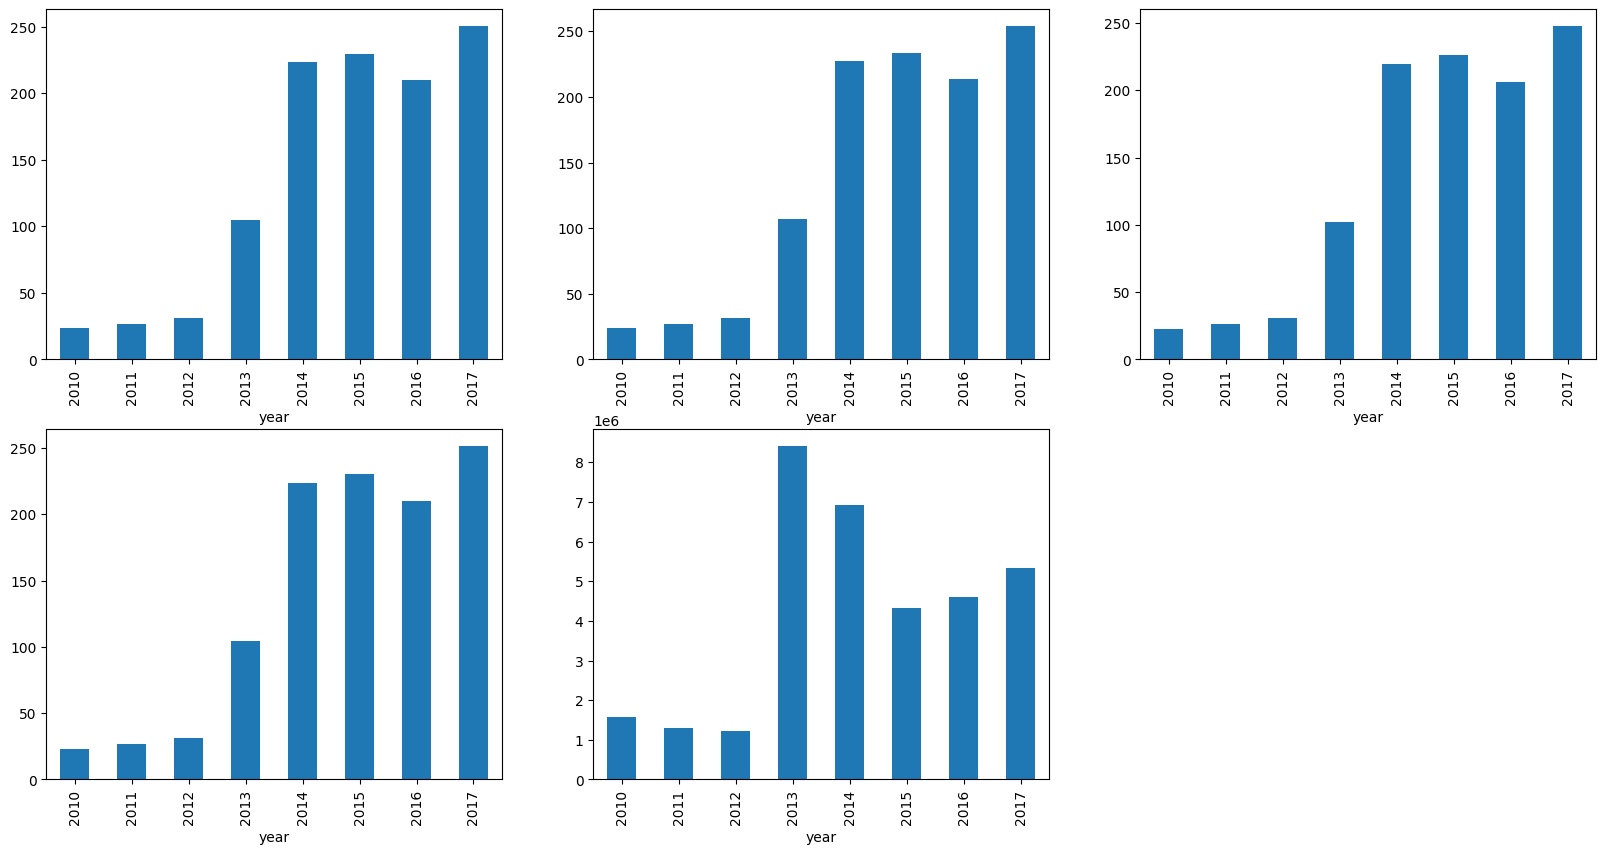

In [30]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    grouped[col].plot.bar()
plt.show()

In [31]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


In [32]:
 df['high-low'] = df['High']-df['Low']

In [33]:
df['open-close'] = df['Open'] - df['Close']

In [34]:
df['target'] = np.where(df['Close'].shift(-1)>df['Close'],1,0)

In [35]:
df.head()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,high-low,open-close,target
0,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,7.459999,-4.889999,0
1,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,7.120001,1.960001,0
2,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,5.650000,3.040001,0
3,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,4.390001,3.799999,0
4,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,4.170000,3.889999,0


In [36]:
df.tail()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,high-low,open-close,target
1687,244.820007,246.850006,242.779999,246.169998,3010700,13,3,2017,1,4.070007,-1.349991,1
1688,246.110001,258.119995,246.020004,258.000000,7575500,14,3,2017,1,12.099991,-11.889999,0
1689,257.000000,261.000000,254.270004,255.729996,4816600,15,3,2017,1,6.729996,1.270004,1
1690,262.399994,265.750000,259.059998,262.049988,7100400,16,3,2017,1,6.690002,0.350006,0
1691,264.000000,265.329987,261.200012,261.500000,6475900,17,3,2017,1,4.129975,2.500000,0


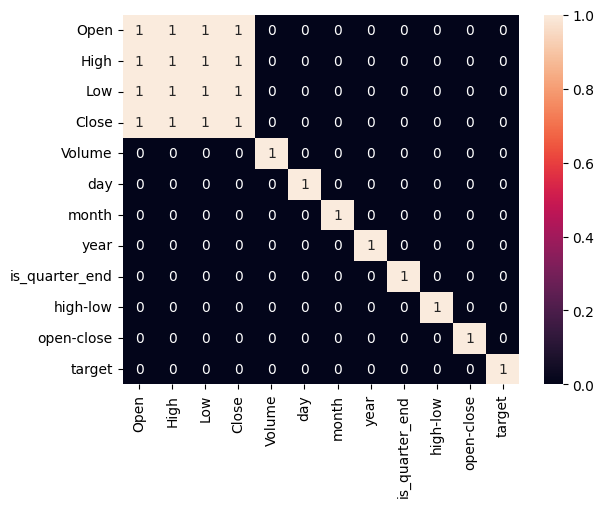

In [37]:
sb.heatmap(df.corr()>0.9,cbar=True,annot=True)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
scaler = StandardScaler()
X= df[['open-close','high-low','is_quarter_end']]
y = df['target']
X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state =2022)

In [41]:
print(X_train.shape,X_test.shape)

(1522, 3) (170, 3)


In [42]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [43]:
from sklearn.metrics import roc_auc_score


In [44]:
y_test.shape

(170,)

In [45]:
log_model.fit(X_train,y_train)
log_train_pred = log_model.predict_proba(X_train)
print(f"trainingScore:{roc_auc_score(y_train,log_train_pred[:,1])}")
log_test_pred = log_model.predict_proba(X_test)
print(f"validScore:{roc_auc_score(y_test,log_test_pred[:,1])}")

trainingScore:0.5191709844559586
validScore:0.5435330347144457


In [46]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',probability=True)
svc.fit(X_train,y_train)
svc_train_pred = svc.predict_proba(X_train)
print(f"trainingScore:{roc_auc_score(y_train,svc_train_pred[:,1])}")
svc_test_pred = svc.predict_proba(X_test)
print(f"trainingScore:{roc_auc_score(y_test,svc_test_pred[:,1])}")



trainingScore:0.4719300518134715
trainingScore:0.445548712206047


In [47]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
xgbc_train_pred = xgbc.predict_proba(X_train)
print(f"trainingScore:{roc_auc_score(y_train,xgbc_train_pred[:,1])}")
xgbc_test_pred = xgbc.predict_proba(X_test)
print(f"trainingScore:{roc_auc_score(y_test,xgbc_test_pred[:,1])}")

trainingScore:0.9633229706390327
trainingScore:0.5105683090705487


In [48]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
y_pred = log_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


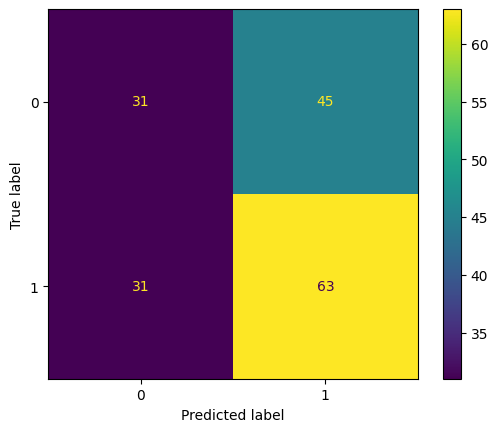

In [49]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()